Adapted from [Fall 2019 Data 100 HW 4: Trump, Twitter, and Text](http://www.ds100.org/fa19/syllabus/)

In [1]:
import numpy as np
from datascience import *

# Table.interactive()

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Project 2: Trump's Tweets

## Table of Contents
<a href='#section 0'>Background Knowledge: Twitter & the President </a>

1. <a href='#section 1'> The Data Science Life Cycle</a>

    a. <a href='#subsection 1a'>Formulating a question or problem</a> 

    b. <a href='#subsection 1b'>Acquiring and cleaning data</a>

    c. <a href='#subsection 1c'>Conducting exploratory data analysis</a>

    d. <a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge: Twitter & the President <a id='section 0'></a>


<img src="twitter_trump.png" width = 1000/>
[Source](https://www.politico.com/magazine/story/2018/01/26/donald-trump-twitter-addiction-216530)

President Donald Trump's Twitter history has grown over time from before he was elected into the presidency. From the image above, we can even see part of how he used his Twitter during the time that he was running for the election.

<div class="alert alert-warning">
<b>Question:</b> What are some key points you notice from the graph above? What are other points in President Trump's time in office that are notable (Think about his election, the Wall, Impeachment, etc.)?
   </div>

*Answer here*

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Trump's Tweets, for example, many people are interested in how he uses twitter to connect with his supporters.

<div class="alert alert-warning">
<b>Question:</b> Recall the questions you developed with your group on Tuesday. Write down that question below, and try to add on to it with the context from the articles from Wednesday. Think about what data you would need to answer your question. You can review the articles on the bCourses page under Module 4.3.
   </div>
   

Original Question(s): *here*


Updated Question(s): *here*



Data you would need: *here*



## Acquiring and cleaning data <a id='subsection 1b'></a>
The following table, `trump`, contains tweets from President Donald Trump's Personal Twitter Account from January 2016 till February 2019. Here is information about the columns of the dataset.

|<center>Codebook</center>|
| --- | --- |
| time |Coordinated Universal Time of Day that the Tweet was published|
| source | Source of the Tweet (Andriod, iPhone, Web Browser, etc.)|
| text| Original Text if the tweet (includes all punctuation)|
|retweet_count| Number of Times Original Tweet was Shared|
|year| Year the Tweet was released|
|est_time| Eastern Standard Time of the Day that the Tweet was published|
|hour| Hour of the Day the Tweet was Published|
|no_punc| Text from Tweet without any punctuation|
|Polarity| Score measuring the sentiment of the Tweet|

In [2]:
trump = Table().read_table('trump_tweets.csv')
trump

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/ ...",1059,2016.05,2016-01-21 08:56:11-05:00,8.93639,bigop1 realdonaldtrump sarahpalinusa https t co ...,0
2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember whe ...",1339,2016.05,2016-01-21 08:57:39-05:00,8.96083,americanaspie glennbeck sarahpalinusa remember whe ...,-2.6
2016-01-21 14:04:54,Twitter for Android,so sad that @cnn and many others refused to show the mas ...,2006,2016.05,2016-01-21 09:04:54-05:00,9.08167,so sad that cnn and many others refused to show the mas ...,-6
2016-01-21 14:19:26,Twitter for Android,"sad sack @jebbush has just done another ad on me, with s ...",2266,2016.05,2016-01-21 09:19:26-05:00,9.32389,sad sack jebbush has just done another ad on me with s ...,4.3
2016-01-21 14:32:57,Twitter for Android,low energy candidate @jebbush has wasted $80 million on ...,2886,2016.05,2016-01-21 09:32:57-05:00,9.54917,low energy candidate jebbush has wasted 80 million on ...,-2.6
2016-01-21 20:36:09,Twitter for iPhone,new day on cnn treats me very badly. @alisyncamerota is ...,1429,2016.05,2016-01-21 15:36:09-05:00,15.6025,new day on cnn treats me very badly alisyncamerota is ...,-5.2
2016-01-21 20:40:07,Twitter for Android,"happy birthday to my friend, the great @jacknicklaus - a ...",1053,2016.05,2016-01-21 15:40:07-05:00,15.6686,happy birthday to my friend the great jacknicklaus a ...,9.7
2016-01-21 23:21:42,Twitter for iPhone,"thank you, iowa! #trump2016 https://t.co/ryhehetlqn",2329,2016.05,2016-01-21 18:21:42-05:00,18.3617,thank you iowa trump2016 https t co ryhehetlqn,1.5
2016-01-21 23:29:04,Twitter for iPhone,thank you! #trump2016 https://t.co/pcdmyio1zt,1463,2016.05,2016-01-21 18:29:04-05:00,18.4844,thank you trump2016 https t co pcdmyio1zt,1.5
2016-01-21 23:29:43,Twitter for iPhone,"thank you, new hampshire! #trump2016 https://t.co/tg9ozkly4l",1761,2016.05,2016-01-21 18:29:43-05:00,18.4953,thank you new hampshire trump2016 https t co tg9ozkly4l,1.5


<div class="alert alert-warning">
<b>Question:</b> It's important to evalute our data source. What do you know about the source (Trump's Twitter Account)? What motivations might he have for posting? What data might be missing? How might deleted tweets be dealt with?
   </div>

*Insert answer*

<div class="alert alert-warning">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? What does each row represent?
    
   </div>

In [3]:
total_rows = ...

*Description of a row here*

## Conducting exploratory data analysis <a id='subsection 1c'></a>

We will explore how Trump's tweets vary by sentiment and extend that analysis in the context of how many retweets he gets and patterns over time. In the end, we will try to answer **"How do Trump's tweets influence the interpretation of big events based on the sentiment of his tweets, reception of his tweets (retweets), and how his tweets of the event progress over time?"**

### Part 1: Polarity & Sentiment

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show a few rows of the lexicon:



In [4]:
print(''.join(open("vader_lexicon.txt").readlines()[300:310]))

lmao	2.0	1.18322	[3, 0, 3, 0, 3, 1, 3, 2, 3, 2]
lmbao	1.8	1.77764	[3, 2, 2, 2, 1, 3, -3, 2, 4, 2]
lmfao	2.5	1.28452	[3, 2, 3, 3, 3, -1, 4, 2, 3, 2]
lmso	2.7	0.78102	[3, 3, 4, 3, 3, 1, 3, 3, 2, 2]
lol	2.9	0.83066	[4, 2, 2, 2, 4, 2, 3, 3, 4, 3]
lolz	2.7	0.78102	[2, 3, 3, 2, 2, 4, 4, 3, 2, 2]
lts	1.6	0.66332	[1, 1, 2, 2, 1, 3, 1, 1, 2, 2]
ly	2.6	0.91652	[2, 2, 1, 3, 4, 4, 3, 2, 2, 3]
ly4e	2.7	0.78102	[3, 3, 3, 2, 1, 3, 3, 4, 2, 3]
lya	3.3	0.78102	[3, 4, 4, 4, 2, 2, 3, 4, 3, 4]



We used the VADER Lexicon to calculate the polarity for each tweet. This is in the "polarity" column of the `trump` table. We can use this to find the most positive and negative tweets.

<div class="alert alert-warning">
<b>Question:</b> Find the 5 most negative tweets in the dataset. (Hint: first, sort the data.)
   </div>

In [5]:
most_negative = trump.sort('polarity').take(np.arange(5))
most_negative


# most_negative = trump...(...)...(np.arange(5))
# most_negative

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2019-01-14 03:12:34,Twitter for iPhone,the trump portrait of an unsustainable border crisis is ...,21601,2019.04,2019-01-13 22:12:34-05:00,22.2094,the trump portrait of an unsustainable border crisis is ...,-20.4
2018-08-20 17:14:59,Twitter for iPhone,it is outrageous that poisonous synthetic heroin fentany ...,26870,2018.63,2018-08-20 12:14:59-05:00,12.2497,it is outrageous that poisonous synthetic heroin fentany ...,-20.3
2018-08-15 14:08:18,Twitter for iPhone,the rigged russian witch hunt goes on and on as the “ori ...,18123,2018.62,2018-08-15 09:08:18-05:00,9.13833,the rigged russian witch hunt goes on and on as the ori ...,-16.6
2018-10-27 21:41:35,Twitter for iPhone,...this evil anti-semitic attack is an assault on humani ...,20506,2018.82,2018-10-27 16:41:35-05:00,16.6931,this evil anti semitic attack is an assault on humani ...,-16.1
2018-04-13 12:01:47,Twitter for iPhone,james comey is a proven leaker & liar. virtually eve ...,31488,2018.28,2018-04-13 07:01:47-05:00,7.02972,james comey is a proven leaker amp liar virtually eve ...,-16


In [6]:
## Just Run this cell to view the whole text of the tweets in a nicer format
print('Most negative tweets:')
for t in most_negative.column('text'):
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

<div class="alert alert-warning">
<b>Question:</b> What patterns do you notice in the most negative tweets?
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> Find the 5 most positive tweets in the dataset. (Hint: first, sort the data.)
   </div>

In [7]:
most_positive = trump.sort('polarity', descending=True).take(np.arange(5))
most_positive

# most_positive = trump.sort('polarity', descending=True).take(np.arange(5))
# most_positive

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2018-04-09 00:43:27,Twitter for iPhone,congratulations to patrick reed on his great and courage ...,12169,2018.27,2018-04-08 19:43:27-05:00,19.7242,congratulations to patrick reed on his great and courage ...,26.5
2019-01-08 14:42:39,Twitter for iPhone,"congratulations to a truly great football team, the clem ...",20559,2019.02,2019-01-08 09:42:39-05:00,9.71083,congratulations to a truly great football team the clem ...,21.2
2018-06-16 13:12:14,Twitter for iPhone,"my supporters are the smartest, strongest, most hard wor ...",40651,2018.45,2018-06-16 08:12:14-05:00,8.20389,my supporters are the smartest strongest most hard wor ...,20.7
2018-07-10 10:59:30,Twitter for iPhone,"thank you to all of my great supporters, really big prog ...",24369,2018.52,2018-07-10 05:59:30-05:00,5.99167,thank you to all of my great supporters really big prog ...,18.9
2018-03-14 00:25:59,Twitter for iPhone,it was my great honor to deliver a message at the marine ...,14786,2018.2,2018-03-13 19:25:59-05:00,19.4331,it was my great honor to deliver a message at the marine ...,18.9


In [8]:
## Just Run this cell to view the whole text of the tweets in a nicer format
print('Most positive tweets:')
for t in most_positive.column('text'):
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

<div class="alert alert-warning">
<b>Question:</b> What patterns do you notice in the most positive tweets?
   </div>

*Answer here*

**Specific Words:** Based on these more extreme tweets, we can see some trends in the tweets. Based on what we know from these tweets and the news. Let's investigate specific words that Trump uses in his tweets. What context does he use these words in?

<div class="alert alert-warning">
<b>Question:</b> Choose 6 different keywords. Then, calculate the average polarity for tweets that contain those keywords. Use the `avg_pol` function. Make sure to run the cell that defines the function. We have provided the word "immigr" as an example for format, feel free to change this.
   </div>
   
Note: Some words are used more often then others, but there is usually a stem or root part of a word that appears more often. For example, if you are interested in immigration consider using "immigr", so that you find cases that contain immigration, immigrant, etc.

In [9]:
## RUN THIS CELL!!
def avg_pol(keyword_array):
    pol_arr = make_array()
    for i in keyword_array:
        tbl = trump.where("no_punc", are.containing(i))
        avg = np.average(tbl.column("polarity"))
        pol_arr = np.append(pol_arr,avg)
    return pol_arr

In [10]:
words = make_array("immigr",  "great", "china", "hillary", "crazy", "wall")
polarity_score = avg_pol(words)
polarity_score

# words = make_array("immigr",  ..., ..., ..., ..., ...)
# polarity_score = avg_pol(words)
# polarity_score

array([-1.35449438,  4.91011132,  1.18322581, -0.74393723, -2.4530303 ,
        0.22851852])

We have compiled the keywords we are interested in and their average polarities. In order to compare the numbers in the array, it would be easier if they were in a table, so let's create one.
<div class="alert alert-warning">
<b>Question:</b> Create a table called `words_polarity` that has two columns. The first called `Word`, and the second called `Average Polarity` which contains the `polarity_score` array we made above. Then, sort the "Average Polarity" column in ascending order.
   </div>

In [11]:
words_polarity = Table().with_columns("Words", words, "Average Polarity", polarity_score).sort("Average Polarity")
words_polarity

# words_polarity = Table().with_columns("...", words, "Average Polarity", ...).sort("Polarity")
# words_polarity

Words,Average Polarity
crazy,-2.45303
immigr,-1.35449
hillary,-0.743937
wall,0.228519
china,1.18323
great,4.91011


<div class="alert alert-warning">
<b>Question:</b> Using the words_polarity table, we can make a bar chart. Fill in the code below.
   </div>

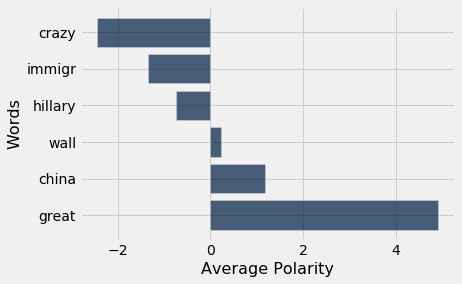

In [12]:
words_polarity.barh("Words")

<div class="alert alert-warning">
<b>Question:</b> What are some possible reasons for the disparities between the bars? 
   </div>

*Insert answer here.*

### Part 2: Polarity in relation to Retweets & Time

In Part 1, we learned about polarity and the sentiment of some of Trump's tweets, but how does this relate to other parts of the data. Two other interesting components are the number of retweets certain posts get over others and differences over time in polarity. How are these variables related to sentiment? Let's start with retweets.

**Retweets:** Similar to other social media platforms, retweeting allows people to share content others post. The higher the number of retweets, then the more popular the post.

<div class="alert alert-warning">
<b>Question:</b> Find the 5 most retweeted posts in the dataset. (Hint: first, sort the data.)
   </div>

In [13]:
most_retweeted = trump.sort("retweet_count", descending= True).take(np.arange(5))
most_retweeted

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2017-07-02 13:21:42,Twitter for iPhone,#fraudnewscnn #fnn https://t.co/wyunhjjujg,370272,2017.5,2017-07-02 08:21:42-05:00,8.36167,fraudnewscnn fnn https t co wyunhjjujg,0
2016-11-08 11:43:14,Twitter for Android,today we make america great again!,337819,2016.85,2016-11-08 06:43:14-05:00,6.72056,today we make america great again,3.1
2017-11-12 00:48:01,Twitter Web Client,"why would kim jong-un insult me by calling me ""old,"" whe ...",254000,2017.86,2017-11-11 19:48:01-05:00,19.8003,why would kim jong un insult me by calling me old whe ...,0.6
2016-11-09 11:36:58,Twitter for Android,such a beautiful and important evening! the forgotten ma ...,215794,2016.86,2016-11-09 06:36:58-05:00,6.61611,such a beautiful and important evening the forgotten ma ...,1.9
2018-01-03 00:49:19,Twitter for iPhone,north korean leader kim jong un just stated that the “nu ...,180010,2018.01,2018-01-02 19:49:19-05:00,19.8219,north korean leader kim jong un just stated that the nu ...,0.5


In [14]:
## Just Run this cell to view the whole text of the tweets in a nicer format
print('Most retweeted posts:')
for t in most_retweeted.column('text'):
    print('\n  ', t)

Most retweeted posts:

   #fraudnewscnn #fnn https://t.co/wyunhjjujg

   today we make america great again!

   why would kim jong-un insult me by calling me "old," when i would never call him "short and fat?" oh well, i try so hard to be his friend - and maybe someday that will happen!

   such a beautiful and important evening! the forgotten man and woman will never be forgotten again. we will all come together as never before

   north korean leader kim jong un just stated that the “nuclear button is on his desk at all times.” will someone from his depleted and food starved regime please inform him that i too have a nuclear button, but it is a much bigger &amp; more powerful one than his, and my button works!


<div class="alert alert-warning">
<b>Question:</b> What patterns do you notice in the most retweeted tweets?
   </div>

*Answer here*


<div class="alert alert-warning">
<b>Question:</b> How do retweets relate to polarity? Make a scatterplot that compares retweets and polarity
   </div>

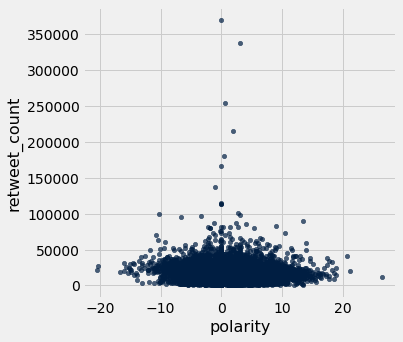

In [15]:
trump.scatter("polarity", "retweet_count")

**Polarity Over Time:** We learned about retweeting patterns a little bit, but how do these patterns vary over time. Let's focus on years, so we can see the broad pattern over time.
<div class="alert alert-warning">
<b>Question:</b> Group the data by year, so that each row represents a unique year. Take the average of every other column. If a column contains strings, make sure to drop it. Call this table `year_group`.
   </div>

In [16]:
year_group = trump.group("year", np.average).drop(1,2,3,5,7)
year_group 

year,retweet_count average,hour average,polarity average
2016.05,1800.73,13.7254,0.190909
2016.06,1971.19,13.813,0.154839
2016.06,1980.92,14.5338,2.444
2016.06,1507.63,12.6652,1.60526
2016.07,1379.13,16.4571,0.404348
2016.07,1676.97,13.2691,0.312903
2016.07,4676.4,15.5756,0.11
2016.07,2184.24,11.3493,0.893939
2016.08,3012.3,10.2797,2.695
2016.08,2971.79,17.7372,1.97143


<div class="alert alert-warning">
<b>Question:</b> Using the grouped table, create a plot comparing `year` by `retweet_count average`.
   </div>

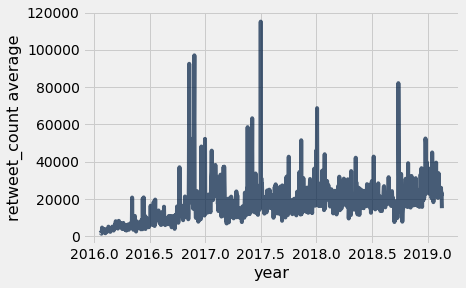

In [17]:
year_group.plot("year", "retweet_count average")

<div class="alert alert-warning">
<b>Question:</b> What do you notice from the plot? What trend exists over time (if any)?
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> Let's do the same for polarity over time. Using the grouped table, create a plot comparing `year` by `polarity average`.
   </div>

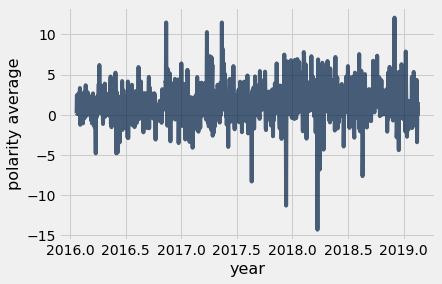

In [18]:
year_group.plot("year", "polarity average")

<div class="alert alert-warning">
<b>Question:</b> What do you notice from the plot? What trend exists over time (if any)?
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> Given the changes in polarity and retweet counts over time, what might we expect to see from Trump's 2020 twitter data?
   </div>

*Answer here.*

## Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some context for the data, let's think back to major events that have happened in Trump's period as president. Consider his fight against Hillary  & Bernie, his inauguration, the witch hunt period, fake new, Russia scandal, and Charlottesville to name a few. These are all major events that happened in the past few years. **How do these events appear in Trump's tweets?**

From the previous sections, we have looked at the polarity of certain words, and we can do something similar to explore these events. As a group, choose an event you would like to explore more in depth.

<div class="alert alert-warning">
<b>Question:</b> What event are you interested in exploring? Determine a keyword you can use to find all related tweets to the event.
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> Use your keyword to find all the tweets where your keyword in contained in the post.
   </div>

In [19]:
event = trump.where("no_punc", are.containing("charlottesville"))
event

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2017-08-12 18:00:28,Twitter for iPhone,am in bedminster for meetings & press conference on ...,11134,2017.61,2017-08-12 13:00:28-05:00,13.0078,am in bedminster for meetings amp press conference on ...,-0.2
2017-08-12 20:23:15,Twitter for iPhone,what is vital now is a swift restoration of law and orde ...,17230,2017.61,2017-08-12 15:23:15-05:00,15.3875,what is vital now is a swift restoration of law and orde ...,3.4
2017-08-12 21:49:47,Media Studio,we will continue to follow developments in charlottesvil ...,15130,2017.61,2017-08-12 16:49:47-05:00,16.8297,we will continue to follow developments in charlottesvil ...,1.5
2017-08-12 23:25:25,Twitter for iPhone,condolences to the family of the young woman killed toda ...,22891,2017.61,2017-08-12 18:25:25-05:00,18.4236,condolences to the family of the young woman killed toda ...,-4.1
2017-08-13 22:03:32,Twitter for iPhone,rt @axios: the doj is opening a civil rights investigati ...,7062,2017.61,2017-08-13 17:03:32-05:00,17.0589,rt axios the doj is opening a civil rights investigati ...,-2.1
2017-08-14 22:29:00,Twitter for iPhone,made additional remarks on charlottesville and realize o ...,32803,2017.62,2017-08-14 17:29:00-05:00,17.4833,made additional remarks on charlottesville and realize o ...,-0.9
2017-08-23 13:40:31,Twitter for iPhone,last night in phoenix i read the things from my statemen ...,19175,2017.64,2017-08-23 08:40:31-05:00,8.67528,last night in phoenix i read the things from my statemen ...,-2.1
2018-08-11 13:26:32,Twitter for iPhone,the riots in charlottesville a year ago resulted in sens ...,30954,2018.61,2018-08-11 08:26:32-05:00,8.44222,the riots in charlottesville a year ago resulted in sens ...,-10.5


<div class="alert alert-warning">
<b>Question:</b> What is the time range of tweets related to your event? How does this compare to what you know of the event? I recommend searching a bit about the event you are exploring.
   </div>

*Answer here*

#### The tweets are primarily from from August 2017, but he wrote a rememberance tweet in August 2018. https://en.wikipedia.org/wiki/Unite_the_Right_rally

<div class="alert alert-warning">
<b>Question:</b> Plot the change over time in retweets for your event. Comment on what patterns you noticed.
   </div>

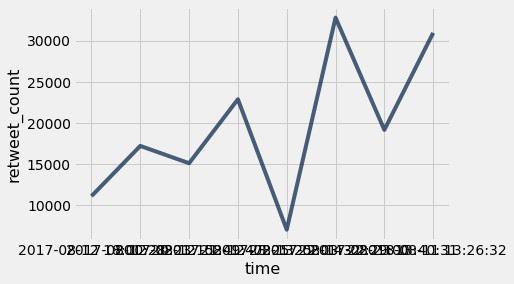

In [20]:
event.plot("time", "retweet_count")

*Comment here*

<div class="alert alert-warning">
<b>Question:</b> Plot the change over time in polarity for your event. Comment on what patterns you noticed.
   </div>

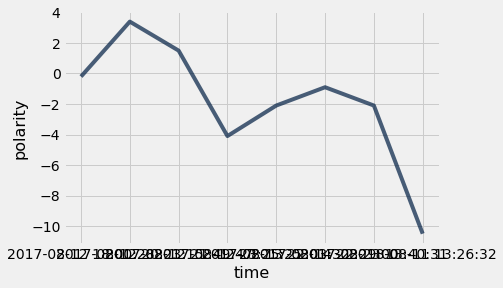

In [21]:
event.plot("time", "polarity")

*Comment here*

<div class="alert alert-warning">
<b>Question:</b> Based on these two measure, how do Trump's tweets frame the event? How does that differ from your interpretation of the event? How is it similar?
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> What impact might President Trump's tweets have an effect on these major events? How does his use of twitter influence individuals who agree and disagree with his beliefs?
   </div>

*Answer here*

<div class="alert alert-warning">
<b>Question:</b> What is something interesting you learned from the project?
   </div>

*Answer here*

Source: Adapted from [Fall 2019 Data 100 HW 4: Trump, Twitter, and Text](http://www.ds100.org/fa19/syllabus/)
Notebook Authors: Alleanna Clark, Ashley Quiterio, Karla Palos Castellanos